# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

* If Jupyter-lab does not work for you, you can also use Google Colab to write the code and export the pdf file.

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [351]:
# Import libraries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter.

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

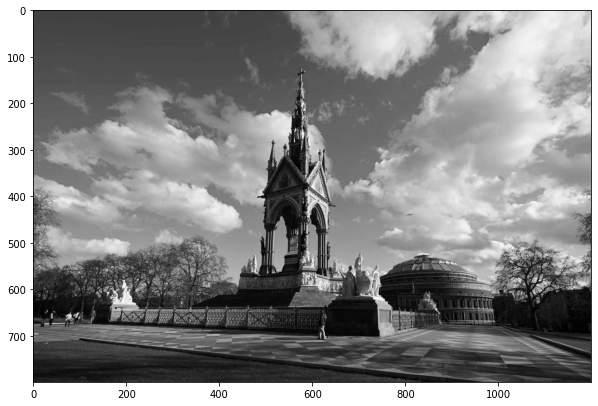

In [352]:
# Read the image (provided)
image = imageio.imread('hyde_park.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

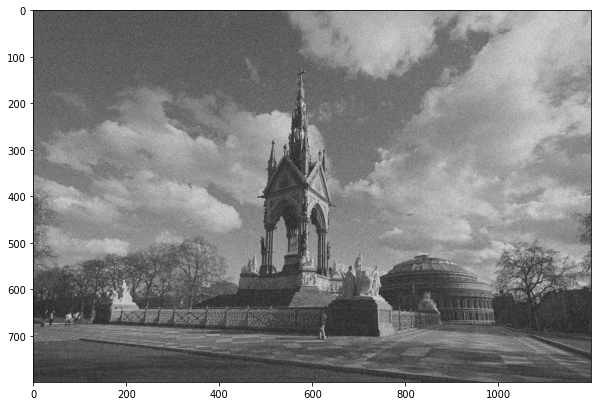

In [353]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


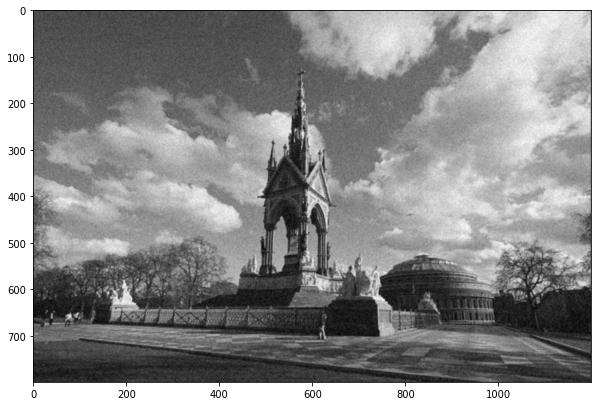

In [354]:
# Design the filter h
h = np.full((3, 3), 1 / 9)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

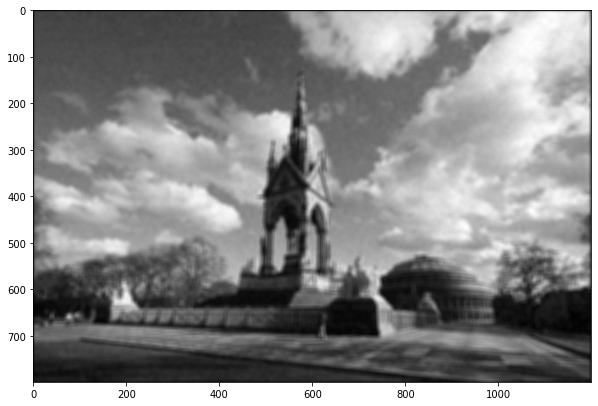

In [355]:
# Design the filter h
h = np.full((11, 11), 1 / 121)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

It is clear that different kernel sizes affect the result quite a bit.

Firstly, the larger the kernel size, the stronger the blur effect will be.

Secondly, the larger kernel size makes the result more resilient to noise as well. The 3x3 variant reduces some noise, but much is still visible, while the 11x11 one resembles the original noise-free image better.

Ultimately, it is a trade-off between noise reduction and blurring strength. The 3x3 kernel leaves out more noise, but generates a less blurry image, while the 11x11 one reduces a lot of the noise, but the result is heavily blurred.

## 2. Edge detection.

Perform edge detection using Prewitt filtering, as well as Gaussian + Prewitt filtering.

### 2.1 Implement 3x3 Prewitt filters and convolve with the noisy image. (10 points)

prewitt_x:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
prewitt_y:
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


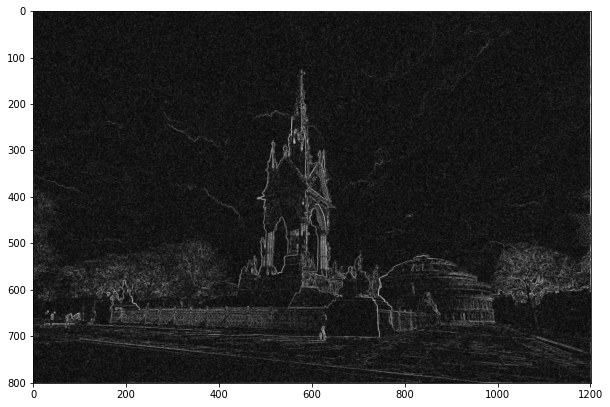

In [356]:
# Design the Prewitt filters
prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]])
prewitt_y = prewitt_x.T

# Prewitt filtering
pr_x = scipy.signal.convolve2d(image_noisy, prewitt_x)
pr_y = scipy.signal.convolve2d(image_noisy, prewitt_y)

# Calculate the gradient magnitude
grad_mag = np.sqrt(pr_x ** 2 + pr_y ** 2)

# Print the filters (provided)
print('prewitt_x:')
print(prewitt_x)
print('prewitt_y:')
print(prewitt_y)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

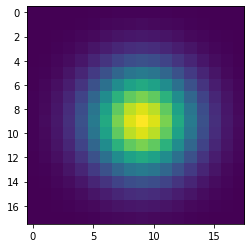

In [357]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel

    def gauss(x, y):
            return math.e ** (-(x ** 2 + y ** 2) / (2 * sigma ** 2)) / (2 * math.pi * sigma ** 2)

    size = 6 * sigma

    mid = int(size / 2)

    h = np.fromfunction(lambda x, y: gauss(x - mid, y - mid), (size, size))
    return h / np.sum(h)


# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Prewitt filtering, show the gradient magnitude image. (5 points)

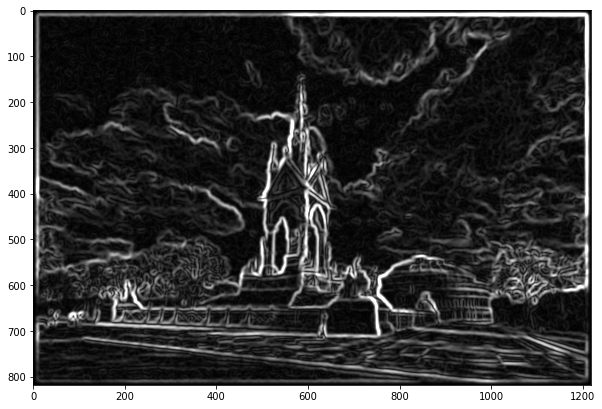

In [358]:
h = gaussian_filter_2d(3)

# Perform Gaussian smoothing before Prewitt filtering
gauss = scipy.signal.convolve2d(image_noisy, h)

# Prewitt filtering
pr_x = scipy.signal.convolve2d(gauss, prewitt_x)
pr_y = scipy.signal.convolve2d(gauss, prewitt_y)

# Calculate the gradient magnitude
grad_mag = np.sqrt(pr_x ** 2 + pr_y ** 2)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Prewitt filtering. (7 points)

35.59539484977722


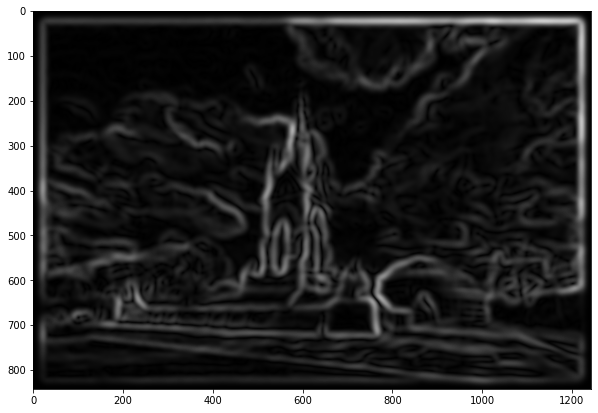

In [364]:
# Construct the Gaussian filter
h = gaussian_filter_2d(7)

# Perform Gaussian smoothing and count time
start = time.time()
gauss = scipy.signal.convolve2d(image_noisy, h)
total_time = time.time() - start

print("Total time (seconds): {0}".format(total_time))

# Prewitt filtering
pr_x = scipy.signal.convolve2d(gauss, prewitt_x)
pr_y = scipy.signal.convolve2d(gauss, prewitt_y)

# Calculate the gradient magnitude
grad_mag = np.sqrt(pr_x ** 2 + pr_y ** 2)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

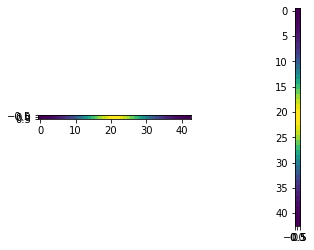

In [360]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel

    size = sigma * 3
    h = math.e ** (-(np.linspace(-size, size, 2 * size + 1) ** 2) / (2 * sigma ** 2)) / (math.sqrt(2 * math.pi) * sigma)

    return np.reshape(h, (1, h.size)) / np.sum(h)


# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = h_x.T

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Prewitt filtering, show results and check whether the results are the same as the previous one without separable filtering. (9 points)

0.3556754684448242


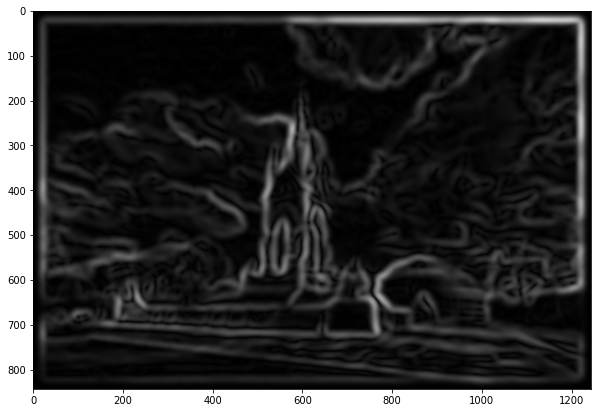

In [368]:
# Perform separable Gaussian smoothing and count time
h_x = gaussian_filter_1d(7)
h_y = h_x.T

start = time.time()
gauss_x = scipy.signal.convolve2d(image_noisy, h_x)
gauss = scipy.signal.convolve2d(gauss_x, h_y)
total_time = time.time() - start

print("Total time (seconds): {0}".format(total_time))

# Prewitt filtering
pr_x = scipy.signal.convolve2d(gauss, prewitt_x)
pr_y = scipy.signal.convolve2d(gauss, prewitt_y)

# Calculate the gradient magnitude
grad_mag2 = np.sqrt(pr_x ** 2 + pr_y ** 2)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.


### 2.7 Comment on the Gaussian + Prewitt filtering results and the computational time. (9 points)

Having run the Gaussian smoothing algorithm both with and without separate filters, we have arrived to the following mean results:

Without separate filters: 3.559539 (over 10 runs)
With separate filters: 0.3556754684448242 (over 50 runs)

Clearly, there is quite a big improvement (roughly 10x in our case) when using separate filters, and these results speak for themselves. This is a clear sign of the great efficiency advantage brought by using separate filters whenever possible.

## 3. Challenge: Implement a 2D Gaussian filter using Pytorch.

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [362]:
# Import libaries (provided)
import torch

ModuleNotFoundError: No module named 'torch'

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (7 points)

In [ ]:
# Expand the dimension of the numpy array


# Convert to a Pytorch tensor using torch.from_numpy


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter. (7 points)

In [ ]:
# A 2D Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
print(h.shape)

# Create the Conv2D filter (provided)
conv = ...

# Set the kernel weight


### 3.3 Apply the filter to the noisy image tensor and display the output image. (6 points)

In [ ]:
# Filtering


# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

## 4. Survey: How long does it take you to complete the coursework?